# **Read the Data**

In [1]:
import pandas as pd
data=pd.read_csv('../input/student-grade-prediction/student-mat.csv')
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [2]:
data.shape

(395, 33)

In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

# **Regression**

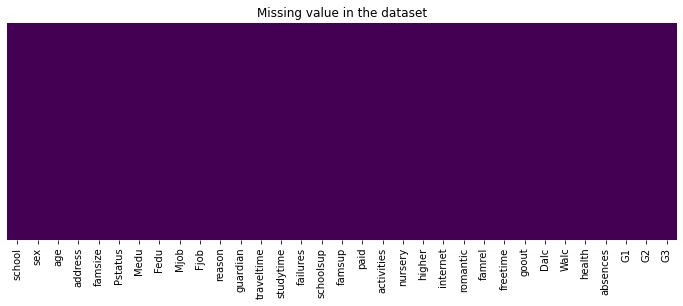

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [7]:
import numpy as np
numeric_columns=data.loc[:, data.columns != 'G3'].select_dtypes(include=np.number).columns.tolist()

<AxesSubplot:>

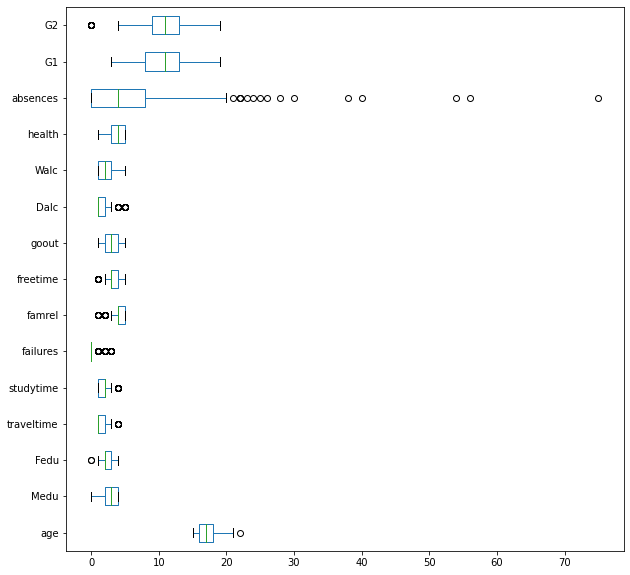

In [8]:
data.boxplot(column=numeric_columns,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [9]:
# get IQR for each numeric column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 age           16.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      1.0
failures       0.0
famrel         4.0
freetime       3.0
goout          2.0
Dalc           1.0
Walc           1.0
health         3.0
absences       0.0
G1             8.0
G2             9.0
Name: 0.25, dtype: float64

Q3:
 age           18.0
Medu           4.0
Fedu           3.0
traveltime     2.0
studytime      2.0
failures       0.0
famrel         5.0
freetime       4.0
goout          4.0
Dalc           2.0
Walc           3.0
health         5.0
absences       8.0
G1            13.0
G2            13.0
Name: 0.75, dtype: float64

IQR:
 age           2.0
Medu          2.0
Fedu          1.0
traveltime    1.0
studytime     1.0
failures      0.0
famrel        1.0
freetime      1.0
goout         2.0
Dalc          1.0
Walc          2.0
health        2.0
absences      8.0
G1            5.0
G2            4.0
dtype: float64

Min:
 age           13.0
Medu          -1.0
Fedu           0.5
traveltim

In [10]:
# remove outlier
non_outlier_data = data.copy()
for x in numeric_columns:
  filter_min = non_outlier_data[x]<boxplot_min[x]
  filter_max = non_outlier_data[x]>boxplot_max[x]
  non_outlier_data = non_outlier_data[~(
    filter_min|filter_max
    )]

In [11]:
non_outlier_data.head(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  

[5 rows x 33 columns]

In [12]:
non_outlier_data.shape

(232, 33)

<AxesSubplot:>

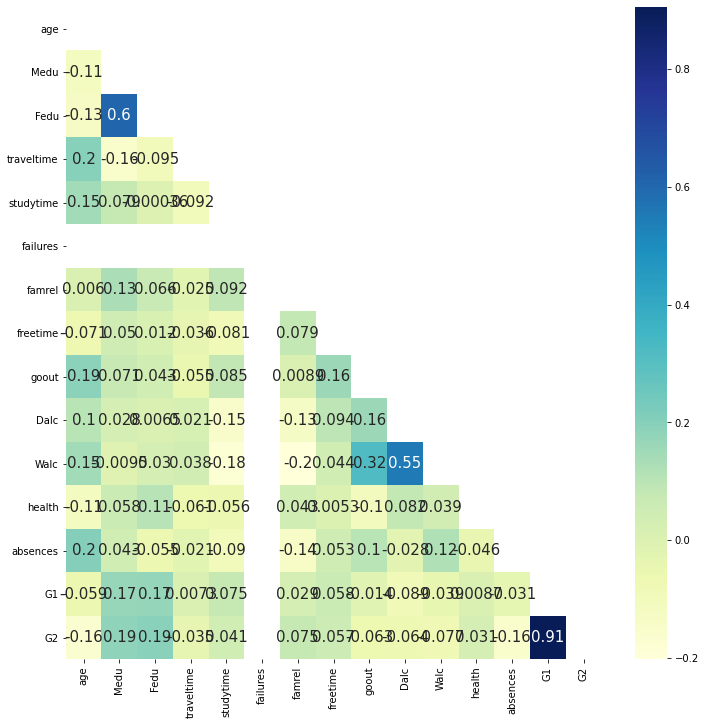

In [13]:
# check correlation between column
correlation_between_columns = non_outlier_data[numeric_columns].corr()
upper_triangle_corr = np.triu(correlation_between_columns)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation_between_columns, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

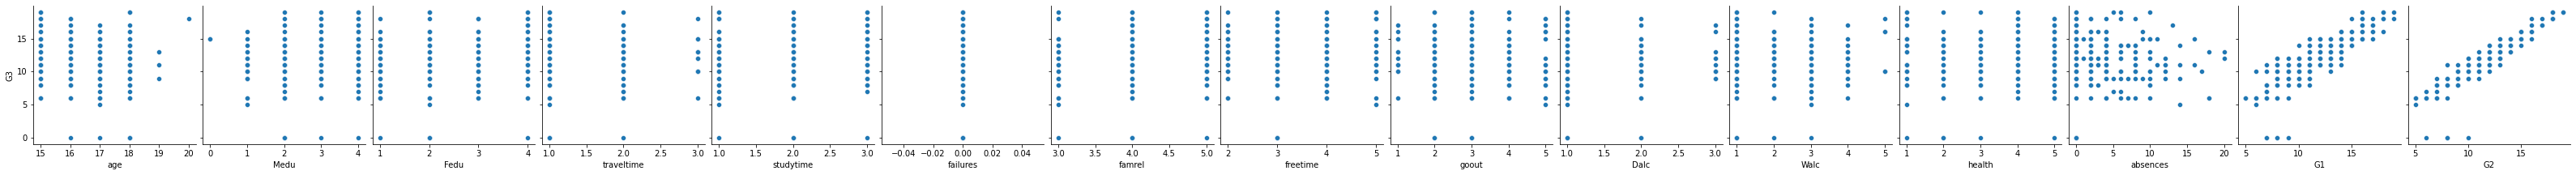

In [14]:
# check linearity between target vs feature
scatter_plot_between_target_feature = sns.pairplot(
    data=non_outlier_data,
    y_vars=['G3'],
    x_vars=numeric_columns,
    height=3,
    kind='scatter'
    )

In [15]:
final_feature_column = ['G1','G2']
target_column = ['G3']
final_column = final_feature_column+target_column
final_data = non_outlier_data[final_column]

In [16]:
final_data.shape

(232, 3)

In [17]:
final_data.head(10)

G1  G2  G3
0    5   6   6
1    5   5   6
3   15  14  15
4    6  10  10
5   15  15  15
6   12  12  11
8   16  18  19
9   14  15  15
10  10   8   9
11  10  12  12

In [18]:
# prepare the data to numpy array
final_feature_array = final_data[final_feature_column].to_numpy()
target_array = final_data[target_column].to_numpy()

In [19]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (232, 2)
shape of target: (232, 1)


In [20]:
import sklearn.model_selection as model_selection
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [21]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(185, 2)

Shape Data X Test:
(47, 2)

Shape Data y Train:
(185, 1)

Shape Data y Test:
(47, 1)


In [22]:
import sklearn.linear_model as linear_model
regression_model = linear_model.LinearRegression()

In [23]:
# train the data
regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# model result
print('Coefficients:\n',regression_model.coef_)
# print('\n')
print('Intercept:',regression_model.intercept_)

Coefficients:
 [[0.04993185 0.99253691]]
Intercept: [-0.43815522]


In [25]:
# predict the X using trained model
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)
target_array_pred = regression_model.predict(final_feature_array)

In [26]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[16]
 [18]
 [10]
 [10]
 [11]]

 Predicted Data
[[15.19887623]
 [18.37621437]
 [ 9.88666871]
 [ 8.8941318 ]
 [11.12886488]]


In [27]:
# check the data in the form of dataframe
final_with_pred_data = final_data.copy()
final_with_pred_data['G3'] = target_array_pred.reshape(-1,)
final_with_pred_data.head(5)

G1  G2         G3
0   5   6   5.766726
1   5   5   4.774189
3  15  14  14.206339
4   6  10   9.786805
5  15  15  15.198876

In [28]:
# evaluate regression model - RMSE
from sklearn.metrics import mean_squared_error
rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print('RMSE Training Data: {}'.format(rmse_training))
print('RMSE Test Data: {}'.format(rmse_test))

RMSE Training Data: 1.2477881806787772
RMSE Test Data: 1.989689866631723


In [29]:
# evaluate regression model - R squared
print('R^2 score:',regression_model.score(X_train, y_train))

R^2 score: 0.8737413075631311


In [30]:
from scipy import stats
residual = (abs(target_array) - abs(target_array_pred))
sw = stats.shapiro(residual)
ks = stats.kstest(residual, 'norm')

print('Shapiro-Wilk test ---- statistic: {}, p-value: {}'.format(sw[0],sw[1]))
print('Kolmogorov-Smirnov test ---- statistic: {}, p-value: {}'.format(ks.statistic,ks.pvalue))

Shapiro-Wilk test ---- statistic: 0.6510142087936401, p-value: 1.502751297287303e-21
Kolmogorov-Smirnov test ---- statistic: 1.0, p-value: 0.0


In [31]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              8723.
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                   3.06e-182
Time:                        04:11:27   Log-Likelihood:                         -304.20
No. Observations:                 185   AIC:                                      612.4
Df Residuals:                     183   BIC:                                      618.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# **Classification**

In [32]:
non_outlier_data.head()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  

[5 rows x 33 columns]

In [33]:
non_outlier_data['avg_score'] = non_outlier_data[['G1', 'G2','G3']].mean(axis=1)
non_outlier_data.drop(['G1', 'G2','G3'], axis=1,inplace=True)
non_outlier_data.head()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ... internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...       no       no       4         3      4    1    1      3        6   
1  ...      yes       no       5         3      3    1    1      3        4   
3  ...      yes      yes       3         2      2    1    1      5        2   
4  ...       no       no       4         3      2    1    2      5        4   
5  ...      yes       no       5         4      2    1    2      5       10   

   avg_score  
0   5.666667  
1   5.333333  
3  14.666667  
4   8.666667  
5  15.000000  

[5 rows x 31 columns]

In [34]:
numeric_columns=non_outlier_data.loc[:, non_outlier_data.columns != 'avg_score'].select_dtypes(include=np.number).columns.tolist()

<AxesSubplot:>

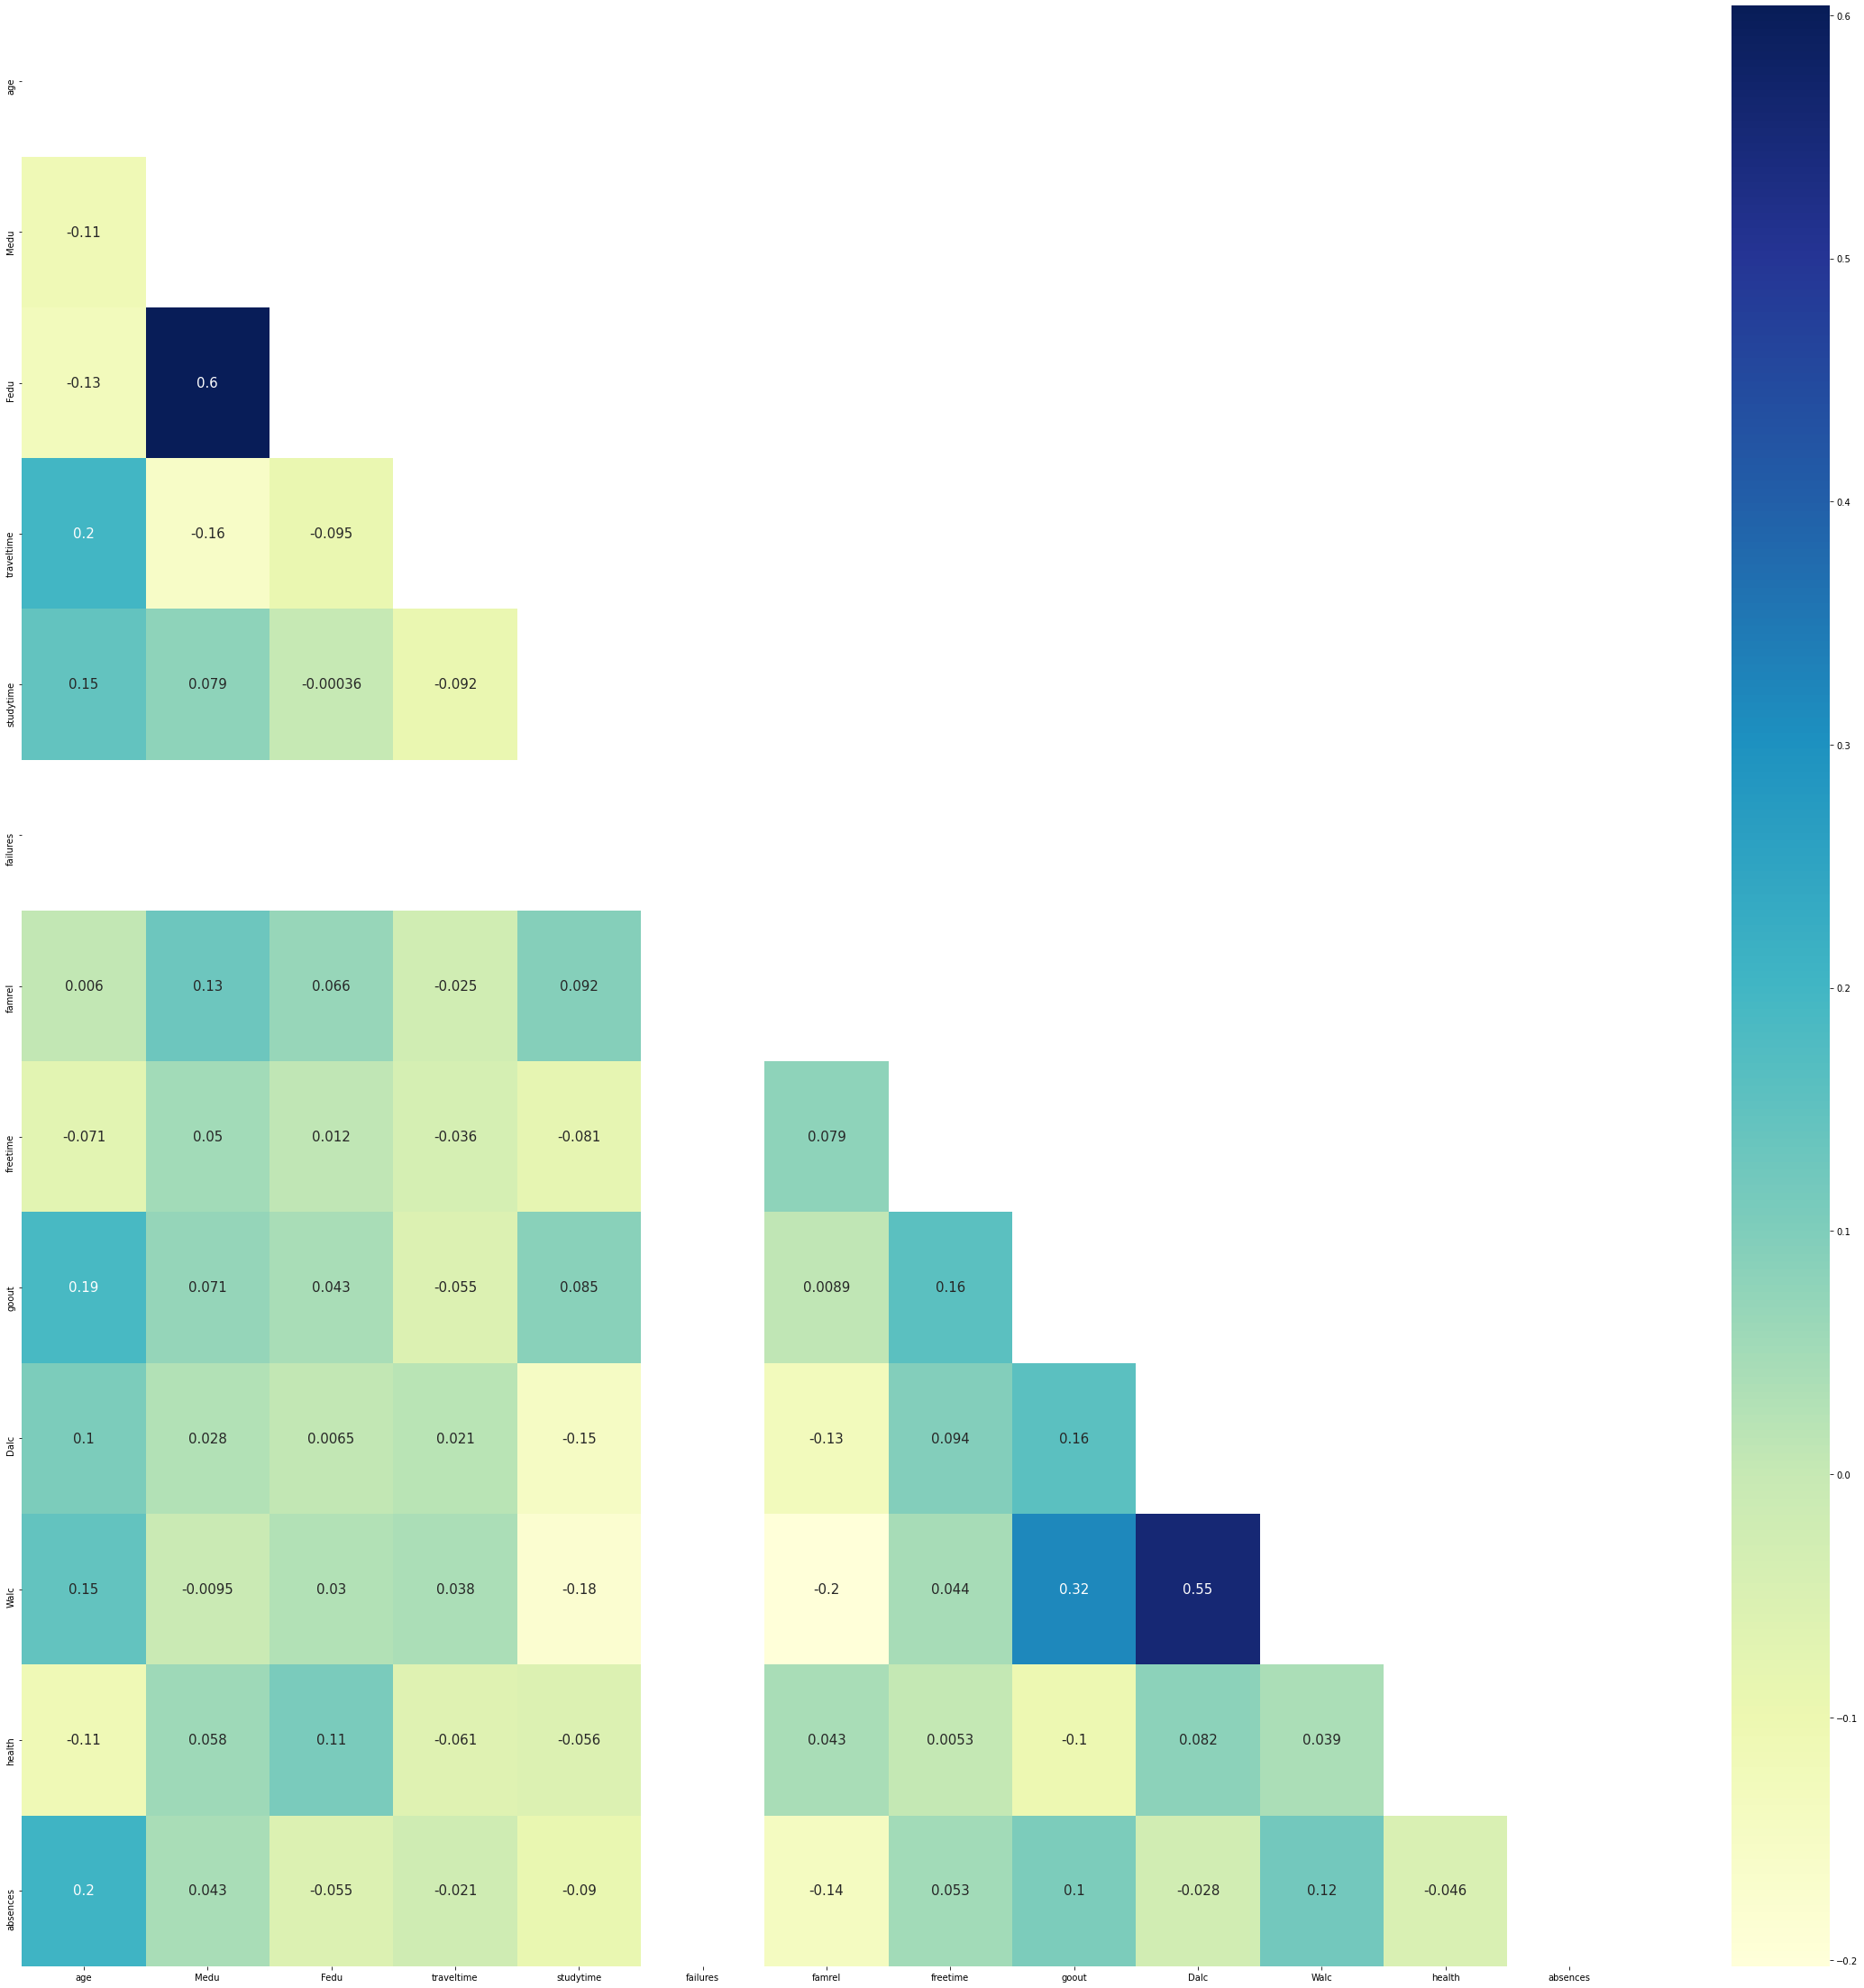

In [35]:
# check correlation between column
correlation_between_column = non_outlier_data[numeric_columns].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [36]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
binary_cols = []

for col in non_outlier_data.columns:
    if non_outlier_data[col].nunique()==2:
        binary_cols.append(col)

In [37]:
for i in binary_cols:
    non_outlier_data[i] = LabelBinarizer().fit_transform(non_outlier_data[i])

In [38]:
non_outlier_data.head().transpose()

0         1          3         4           5
school             0         0          0         0           0
sex                0         0          0         0           1
age               18        17         15        16          16
address            1         1          1         1           1
famsize            0         0          0         0           1
Pstatus            0         1          1         1           1
Medu               4         1          4         3           4
Fedu               4         1          2         3           3
Mjob         at_home   at_home     health     other    services
Fjob         teacher     other   services     other       other
reason        course    course       home      home  reputation
guardian      mother    father     mother    father      mother
traveltime         2         1          1         1           1
studytime          2         2          3         2           2
failures           0         0          0         0           0
schoolsup          1         0          0         0           0
famsup             0         1          1         1           1
paid               0         0          1         1           1
activities         0         0          1         0           1
nursery            1         0          1         1           1
higher             1         1          1         1           1
internet           0         1          1         0           1
romantic           0         0          1         0           0
famrel             4         5          3         4           5
freetime           3         3          2         3           4
goout              4         3          2         2           2
Dalc               1         1          1         1           1
Walc               1         1          1         2           2
health             3         3          5         5           5
absences           6         4          2         4          10
avg_score   5.666667  5.333333  14.666667  8.666667        15.0

In [39]:
categorical_cols = [column for column in non_outlier_data.columns if (non_outlier_data[column].nunique()<=30)]
str_col = [col for col in categorical_cols if data[col].dtype =='O']
str_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [40]:
for i in str_col:
    print(i, ' :', non_outlier_data[i].unique())

school  : [0 1]
sex  : [0 1]
address  : [1 0]
famsize  : [0 1]
Pstatus  : [0 1]
Mjob  : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  : ['teacher' 'other' 'services' 'health' 'at_home']
reason  : ['course' 'home' 'reputation' 'other']
guardian  : ['mother' 'father' 'other']
schoolsup  : [1 0]
famsup  : [0 1]
paid  : [0 1]
activities  : [0 1]
nursery  : [1 0]
higher  : [1 0]
internet  : [0 1]
romantic  : [0 1]


In [41]:
non_outlier_data_ = non_outlier_data.copy()

In [42]:
for i in str_col:
    print(i)
    non_outlier_data = pd.concat([non_outlier_data.drop(i, axis = 1), pd.get_dummies(non_outlier_data[i], prefix=i, drop_first = True)], axis = 1)

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


In [43]:
non_outlier_data['Good_Student'] = non_outlier_data['avg_score'].copy()

In [44]:
def classify(x):
    if x > 15:
        return 1
    else:
        return 0

non_outlier_data['Good_Student'] = non_outlier_data['avg_score'].apply(classify)

In [45]:
non_outlier_data.head(10).transpose()

0          1          3          4     5   \
age                18.000000  17.000000  15.000000  16.000000  16.0   
Medu                4.000000   1.000000   4.000000   3.000000   4.0   
Fedu                4.000000   1.000000   2.000000   3.000000   3.0   
traveltime          2.000000   1.000000   1.000000   1.000000   1.0   
studytime           2.000000   2.000000   3.000000   2.000000   2.0   
failures            0.000000   0.000000   0.000000   0.000000   0.0   
famrel              4.000000   5.000000   3.000000   4.000000   5.0   
freetime            3.000000   3.000000   2.000000   3.000000   4.0   
goout               4.000000   3.000000   2.000000   2.000000   2.0   
Dalc                1.000000   1.000000   1.000000   1.000000   1.0   
Walc                1.000000   1.000000   1.000000   2.000000   2.0   
health              3.000000   3.000000   5.000000   5.000000   5.0   
absences            6.000000   4.000000   2.000000   4.000000  10.0   
avg_score           5.666667   5.333333  14.666667   8.666667  15.0   
school_1            0.000000   0.000000   0.000000   0.000000   0.0   
sex_1               0.000000   0.000000   0.000000   0.000000   1.0   
address_1           1.000000   1.000000   1.000000   1.000000   1.0   
famsize_1           0.000000   0.000000   0.000000   0.000000   1.0   
Pstatus_1           0.000000   1.000000   1.000000   1.000000   1.0   
Mjob_health         0.000000   0.000000   1.000000   0.000000   0.0   
Mjob_other          0.000000   0.000000   0.000000   1.000000   0.0   
Mjob_services       0.000000   0.000000   0.000000   0.000000   1.0   
Mjob_teacher        0.000000   0.000000   0.000000   0.000000   0.0   
Fjob_health         0.000000   0.000000   0.000000   0.000000   0.0   
Fjob_other          0.000000   1.000000   0.000000   1.000000   1.0   
Fjob_services       0.000000   0.000000   1.000000   0.000000   0.0   
Fjob_teacher        1.000000   0.000000   0.000000   0.000000   0.0   
reason_home         0.000000   0.000000   1.000000   1.000000   0.0   
reason_other        0.000000   0.000000   0.000000   0.000000   0.0   
reason_reputation   0.000000   0.000000   0.000000   0.000000   1.0   
guardian_mother     1.000000   0.000000   1.000000   0.000000   1.0   
guardian_other      0.000000   0.000000   0.000000   0.000000   0.0   
schoolsup_1         1.000000   0.000000   0.000000   0.000000   0.0   
famsup_1            0.000000   1.000000   1.000000   1.000000   1.0   
paid_1              0.000000   0.000000   1.000000   1.000000   1.0   
activities_1        0.000000   0.000000   1.000000   0.000000   1.0   
nursery_1           1.000000   0.000000   1.000000   1.000000   1.0   
higher_1            1.000000   1.000000   1.000000   1.000000   1.0   
internet_1          0.000000   1.000000   1.000000   0.000000   1.0   
romantic_1          0.000000   0.000000   1.000000   0.000000   0.0   
Good_Student        0.000000   0.000000   0.000000   0.000000   0.0   

                          6          8          9     10         11  
age                16.000000  15.000000  15.000000  15.0  15.000000  
Medu                2.000000   3.000000   3.000000   4.0   2.000000  
Fedu                2.000000   2.000000   4.000000   4.0   1.000000  
traveltime          1.000000   1.000000   1.000000   1.0   3.000000  
studytime           2.000000   2.000000   2.000000   2.0   3.000000  
failures            0.000000   0.000000   0.000000   0.0   0.000000  
famrel              4.000000   4.000000   5.000000   3.0   5.000000  
freetime            4.000000   2.000000   5.000000   3.0   2.000000  
goout               4.000000   2.000000   1.000000   3.0   2.000000  
Dalc                1.000000   1.000000   1.000000   1.0   1.000000  
Walc                1.000000   1.000000   1.000000   2.0   1.000000  
health              3.000000   1.000000   5.000000   2.0   4.000000  
absences            0.000000   0.000000   0.000000   0.0   4.000000  
avg_score          11.666667  17.666667  14.666667   9.0  11.33

In [46]:
non_outlier_data.drop(['avg_score'], axis = 1,inplace=True)

In [47]:
# prepare the data to numpy array
final_feature_column=non_outlier_data.loc[:, non_outlier_data.columns != 'Good_Student'].columns.tolist()
final_feature_array = non_outlier_data[final_feature_column].to_numpy()
target_array = non_outlier_data['Good_Student'].to_numpy()

In [48]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (232, 39)
shape of target: (232,)


In [49]:
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [50]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(185, 39)

Shape Data X Test:
(47, 39)

Shape Data y Train:
(185,)

Shape Data y Test:
(47,)


In [51]:
# load the algorithm
import sklearn.neighbors as neighbors
classification_model = neighbors.KNeighborsClassifier(n_neighbors=10)

In [52]:
# train the data
classification_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
# predict the X using trained model
y_train_pred = classification_model.predict(X_train)
y_test_pred = classification_model.predict(X_test)
target_array_pred = classification_model.predict(final_feature_array)

In [54]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[1 1 0 0 0]

 Predicted Data
[0 1 0 0 0]


In [55]:
# check the data in the form of dataframe
final_with_pred_data = non_outlier_data.copy()
final_with_pred_data['is_Good_Student_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_data.head(5)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   
5   16     4     3           1          2         0       5         4      2   

   Dalc  ...  schoolsup_1  famsup_1  paid_1  activities_1  nursery_1  \
0     1  ...            1         0       0             0          1   
1     1  ...            0         1       0             0          0   
3     1  ...            0         1       1             1          1   
4     1  ...            0         1       1             0          1   
5     1  ...            0         1       1             1          1   

   higher_1  internet_1  romantic_1  Good_Student  is_Good_Student_predicted  
0         1           0           0             0                          0  
1         1           1           0             0                          0  
3         1           1           1             0                          0  
4         1           0           0             0                          0  
5         1           1           0             0                          0  

[5 rows x 41 columns]

In [56]:
# evaluate classification model - accuracy
import sklearn.metrics as metrics
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

print('Accuracy Training Data: {}'.format(accuracy_training))
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Training Data: 0.8594594594594595
Accuracy Test Data: 0.851063829787234


In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[157   1]
 [ 25   2]]
[[40  0]
 [ 7  0]]
